# Decision Dependent Games Simulation
## Synthetic Linear Regression Problem with Location Families
## Derivative Free Optimization Test

The following is an implementation of the DFO algorithm from "Online convex optimization in the bandit setting: gradient descent without a gradient" by Flaxman et. al. (2008)

In [1]:
import numpy as np
import sys
import ipdb

sys.path.append("../")

sys.path.append("../utils/")
from utils_functions import *

from dd_game import *
from solo_player import *

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# np.random.seed(376388)

# Configurations

In [2]:
d_1 = 2  # Dimension of each player's data/strategy
d_2 = 2

epsilon_1 = 1  # Epsilon sensitivity parameters
epsilon_2 = 1

Sigma_x_p1 = np.eye(d_1)  # Covariance of x^k
Sigma_x_p2 = np.eye(d_2)

sigma_y_p1 = 0.01  # Variance of y^k
sigma_y_p2 = 0.01

beta_p1 = np.random.normal(size=d_1)  # Linear parameter vector
beta_p2 = np.random.normal(size=d_2)

s_1 = sample_sphere(epsilon_1,d_1+d_2)  # Performativity parameters
mu_p1 = s_1[0:d_1]
gamma_p1 = s_1[d_1:]
s_2 = sample_sphere(epsilon_2,d_1+d_2)
mu_p2 = s_2[0:d_2]
gamma_p2 = s_2[d_2:]

In [3]:
p1_data_params = (Sigma_x_p1, sigma_y_p1, beta_p1, mu_p1, gamma_p1)
p1_data_generating_func = sample_from_location_family

p2_data_params = (Sigma_x_p2, sigma_y_p2, beta_p2, mu_p2, gamma_p2)
p2_data_generating_func = sample_from_location_family

num_rounds_lst = [10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000]
num_alternate_rounds = 100
num_test = 1000

# Run Game

In [4]:
p1_risks = []
p2_risks = []
theta_final_p1 = []
theta_final_p2 = []

for num_rounds in num_rounds_lst:
    print(f"num_rounds = {num_rounds}")
    player_two = SoloPlayer()
    player_one = SoloPlayer()
    game = DecisionDependentGame(player_one, player_two,
                                 p1_data_params, p2_data_params,
                                 p1_data_generating_func, p2_data_generating_func,
                                 num_rounds, num_alternate_rounds, num_test)
    
    game.run_train()
    game.run_post_train_alternating()
    
    PR1, PR2 = game.evaluate_closed_perf_risk()
    p1_risks.append(PR1)
    p2_risks.append(PR2)
    
    theta_final_p1.append(game.theta_p1)
    theta_final_p2.append(game.theta_p2)
    
    #Change this flag if one wants to change print settings
    if True:
        print("---------------------")
        print("Player 1: Actual mu, gamma")
        print(mu_p1, gamma_p1)
        print("Player 1: Estimated mu, gamma")
        print(player_one.mu_hat, player_one.gamma_hat)

        print("Player 2: Actual mu, gamma")
        print(mu_p2, gamma_p2)
        print("Player 2: Estimated mu, gamma")
        print(player_two.mu_hat, player_two.gamma_hat)
        print("---------------------")

num_rounds = 10
Stage 1 finished. Performing estimation now
Stage 1 finished. Performing estimation now
Stage 2 finished. Finding qs now.
Stage 2 finished. Finding qs now.
---------------------
Player 1: Actual mu, gamma
[-0.26958936 -0.53776937] [ 0.34760806 -0.71923175]
Player 1: Estimated mu, gamma
[-0.14783784 -1.01878826] None
Player 2: Actual mu, gamma
[-0.12328165 -0.1375479 ] [-0.9196101  -0.34669795]
Player 2: Estimated mu, gamma
[0.60030457 0.46927656] None
---------------------
num_rounds = 50
Stage 1 finished. Performing estimation now
Stage 1 finished. Performing estimation now
Stage 2 finished. Finding qs now.
Stage 2 finished. Finding qs now.
---------------------
Player 1: Actual mu, gamma
[-0.26958936 -0.53776937] [ 0.34760806 -0.71923175]
Player 1: Estimated mu, gamma
[-0.56951655 -0.39223475] None
Player 2: Actual mu, gamma
[-0.12328165 -0.1375479 ] [-0.9196101  -0.34669795]
Player 2: Estimated mu, gamma
[-0.16715982 -0.12100031] None
---------------------
num_rounds

## Evaluate the performative risks after 2 Stage Algorithm

In [5]:
print(f'theta_1 = {player_one.theta_history[-1]}\ntheta_2 = {player_two.theta_history[-1]}')
print(f'Player 1 PR = {p1_risks[-1].round(3)}\tPlayer 2 PR = {p2_risks[-1].round(3)}')

theta_1 = [0.18288038 0.20670154]
theta_2 = [ 0.99311023 -0.16518383]
Player 1 PR = 0.056	Player 2 PR = 0.063


In [6]:
game.theta_p1, game.theta_p2 = game.solve_nash()
PO_1, PO_2 = game.evaluate_closed_perf_risk()
print(f'theta_1_PO = {game.theta_p1}\ntheta_2_PO = {game.theta_p2}')
print(f'Player 1 PO = {PO_1.round(3)}\tPlayer 2 PO = {PO_2.round(3)}')

theta_1_PO = [0.2791628 0.4006214]
theta_2_PO = [ 0.94501698 -0.21938959]
Player 1 PO = 0.032	Player 2 PO = 0.125


In [7]:
game.theta_p1, game.theta_p2 = game.solve_social_opt()
SO_1, SO_2 = game.evaluate_closed_perf_risk()
print(f'theta_1_SO = {game.theta_p1}\ntheta_2_SO = {game.theta_p2}')
print(f'Player 1 SO = {SO_1.round(3)}\tPlayer 2 SO = {SO_2.round(3)}')

theta_1_SO = [0.07748765 0.19118794]
theta_2_SO = [ 0.85333234 -0.02978312]
Player 1 SO = 0.04	Player 2 SO = 0.052


## Plots

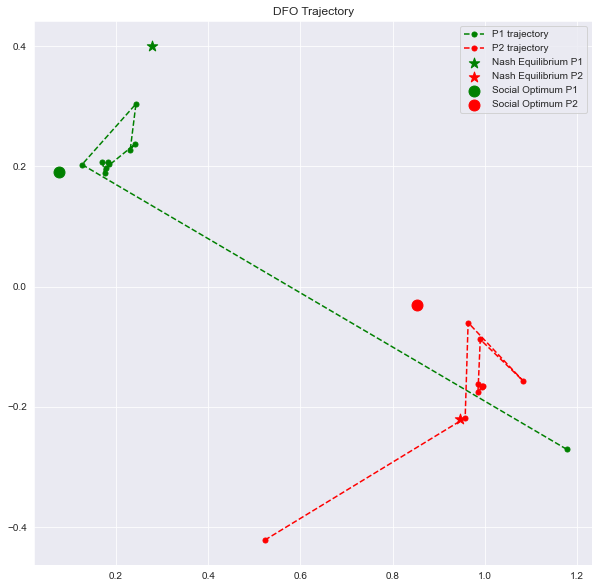

In [8]:
plt.figure(figsize=(10,10))
theta_PO_1, theta_PO_2 = game.solve_nash()
x_nash_p1 = theta_PO_1[0]
y_nash_p1 = theta_PO_1[1]
plt.scatter(x_nash_p1, y_nash_p1,
            label='Nash Equilibrium P1', marker='*', color='g', s=120)

x_nash_p2 = theta_PO_2[0]
y_nash_p2 = theta_PO_2[1]
plt.scatter(x_nash_p2,y_nash_p2,
            label='Nash Equilibrium P2', marker='*', color='r', s=120)

theta_SO_1, theta_SO_2 = game.solve_social_opt()
x_so_p1 = theta_SO_1[0]
y_so_p1 = theta_SO_1[1]
plt.scatter(x_so_p1, y_so_p1,
            label='Social Optimum P1', marker='o', color='g', s=120)

x_so_p2 = theta_SO_2[0]
y_so_p2 = theta_SO_2[1]
plt.scatter(x_so_p2,y_so_p2,
            label='Social Optimum P2', marker='o', color='r', s=120)

x1 = np.array(theta_final_p1)[:,0]
y1 = np.array(theta_final_p1)[:,1]
plt.plot(x1,y1,
         '--', label='P1 trajectory', marker='o', color='g', markersize=5)

x2 = np.array(theta_final_p2)[:,0]
y2 = np.array(theta_final_p2)[:,1]
plt.plot(x2,y2,
         '--', label='P2 trajectory', marker='o', color='r', markersize=5)

plt.legend()
plt.title("DFO Trajectory")
plt.show()

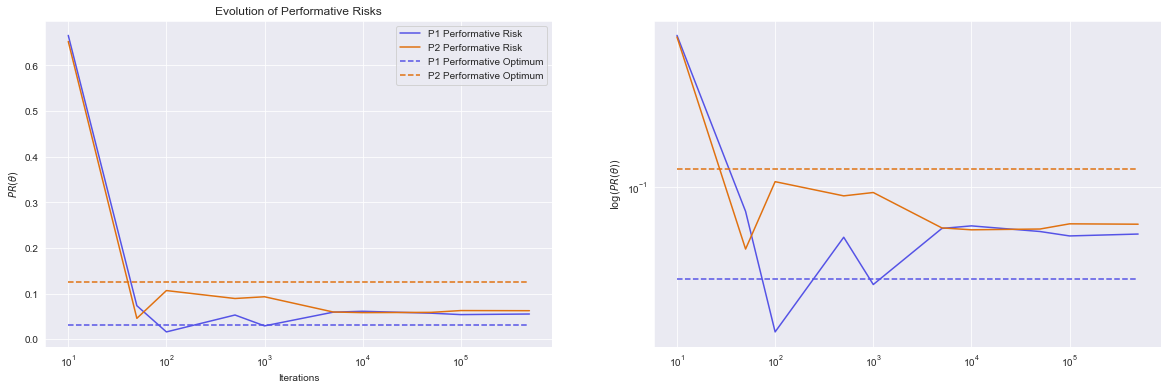

In [9]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(num_rounds_lst, p1_risks,
         color='#5553E6', label='P1 Performative Risk')
plt.semilogx(num_rounds_lst, p2_risks,
         color='#E07110', label='P2 Performative Risk')

plt.semilogx(num_rounds_lst, [PO_1 for i in num_rounds_lst],
             '--', color='#5553E6', label='P1 Performative Optimum')
plt.semilogx(num_rounds_lst, [PO_2 for i in num_rounds_lst],
             '--', color='#E07110', label='P2 Performative Optimum')
plt.xlabel("Iterations")
plt.ylabel(r"$PR(\theta)$")
plt.title("Evolution of Performative Risks")
plt.legend()

plt.subplot(1,2,2)
plt.loglog(num_rounds_lst, p1_risks,
           color='#5553E6', label='P1 Performative Risk')
plt.loglog(num_rounds_lst, p2_risks,
           color='#E07110', label='P2 Performative Risk')

plt.loglog(num_rounds_lst, [PO_1 for i in num_rounds_lst],
           '--', color='#5553E6', label='P1 Performative Optimum')
plt.loglog(num_rounds_lst, [PO_2 for i in num_rounds_lst],
           '--', color='#E07110', label='P2 Performative Optimum')
plt.ylabel(r"$\log(PR(\theta))$")
plt.show()

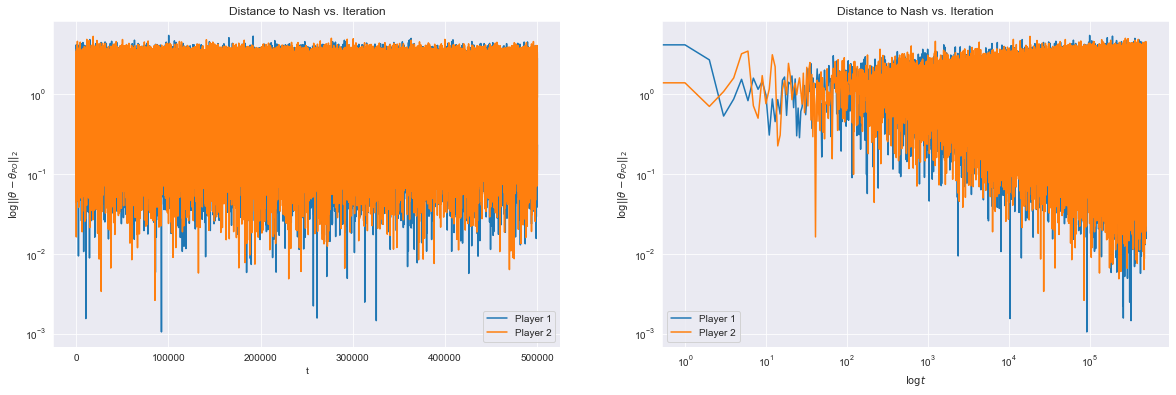

In [10]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.semilogy([t for t in range(len(player_one.theta_history))],np.linalg.norm(PO_1-np.array(player_one.theta_history),axis=1),label='Player 1')
plt.semilogy([t for t in range(len(player_two.theta_history))],np.linalg.norm(PO_2-np.array(player_two.theta_history),axis=1),label='Player 2')
plt.title("Distance to Nash vs. Iteration")
plt.ylabel(r"$\log||\theta - \theta_{PO}||_2$")
plt.xlabel(r"t")
plt.legend()
plt.subplot(1,2,2)
plt.loglog([t for t in range(len(player_one.theta_history))],np.linalg.norm(PO_1-np.array(player_one.theta_history),axis=1),label='Player 1')
plt.loglog([t for t in range(len(player_two.theta_history))],np.linalg.norm(PO_2-np.array(player_two.theta_history),axis=1),label='Player 2')
plt.title("Distance to Nash vs. Iteration")
plt.ylabel(r"$\log||\theta - \theta_{PO}||_2$")
plt.xlabel(r"$\log t$")
plt.legend()
plt.show()